# 2. Fancy Tricks with Simple Numbers

## Dealing with Counts

### FIXED-WIDTH BINNING

In [1]:
import numpy as np

# Generate 20 random integers uniformly between 0 and 99
small_counts = np.random.randint(0, 100, 20)
small_counts

array([36, 18, 72, 18, 23,  4, 96, 45, 18, 85, 38, 83, 66, 42, 42, 41, 93,
       87, 95, 46])

In [2]:
# Map to evenly spaced bins 0-9 by division
np.floor_divide(small_counts, 10)

array([3, 1, 7, 1, 2, 0, 9, 4, 1, 8, 3, 8, 6, 4, 4, 4, 9, 8, 9, 4])

In [3]:
# An array of counts that span several magnitudes
>>> large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 
...                 44, 28, 7971, 926, 122, 22222]

In [4]:
# Map to exponential-width bins via the log function
>>> np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

### QUANTILE BINNING

In [5]:
# Continue example 2-3 with large_counts
>>> import pandas as pd

# Map the counts to quartiles
>>> pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [6]:
# Compute the quantiles themselves
>>> large_counts_series = pd.Series(large_counts)
>>> large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## Log Transformation

In [7]:
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [12]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [9]:
df.shape

(39644, 61)

In [10]:
# Take the log transform of the 'n_tokens_content' feature, which 
# represents the number of words (tokens) in a news article.

# Note that we add 1 to the raw count to prevent the logarithm from
# exploding into negative infinity in case the count is zero.
df['log_n_tokens_content'] = np.log10(df[' n_tokens_content'] + 1)

Text(0, 0.5, 'Number of Articles')

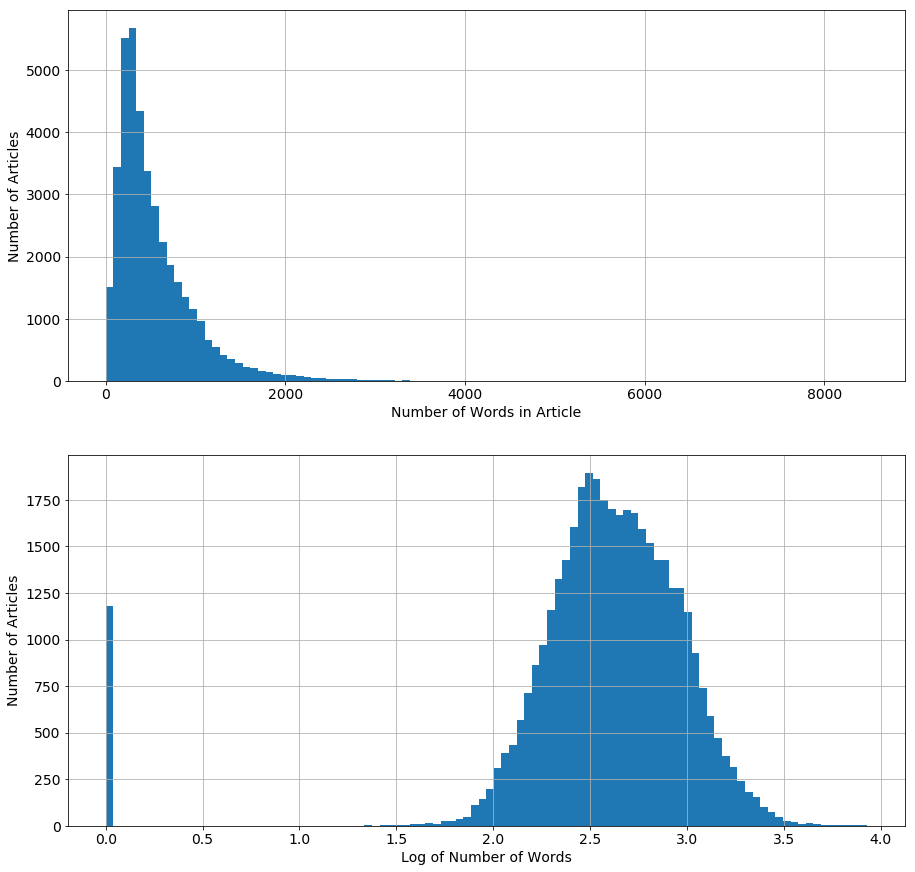

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))

df[' n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

### Log Transform in Action

For the Mashable news articles, we’ll use the number of words in an article to predict its popularity. Since the outputs are continuous numbers, we’ll use simple linear regression as the model. We use scikit-learn to perform 10-fold cross validation of linear regression on the feature with and without log transformation

In [19]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

# Train two linear regression models to predict the number of shares
# of an article, one using the original feature and the other the
# log transformed version.
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, df[[' n_tokens_content']], df[' shares'], cv=10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, df[['log_n_tokens_content']], df[' shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


The confidence intervals still overlap, but the model with the log transformed feature is doing better than the one without. Why is the log transform so much more successful on this dataset?

Text(0, 0.5, 'Number of Shares')

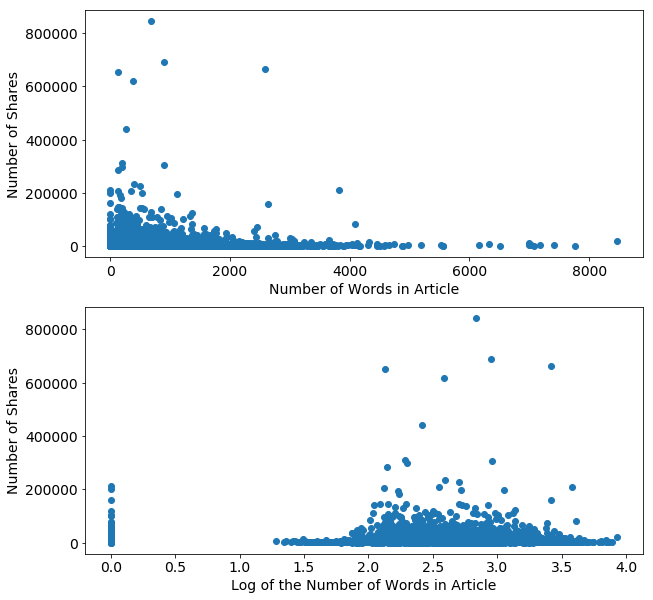

In [22]:
fig2, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

ax1.scatter(df[' n_tokens_content'], df[' shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df[' shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

the log transform reshaped the x-axis. This gives the linear model more “breathing room” on the low end of the input feature space.

Without the log transform (top panel), the model is under more pressure to fit very different target values under very small changes in the input.

### Power Transforms: Generalization of the Log Transform

In [35]:
df2 = df[df[' n_tokens_content'] != 0].copy()

In [36]:
from scipy import stats

# Continuing from the previous example, assume biz_df contains
# the Yelp business reviews data.
# The Box-Cox transform assumes that input data is positive. 
# Check the min to make sure.
df2[' n_tokens_content'].min()

18.0

In [37]:
# Setting input parameter lmbda to 0 gives us the log transform (without 
# constant offset)
rc_log = stats.boxcox(df2[' n_tokens_content'], lmbda=0)
# By default, the scipy implementation of Box-Cox transform finds the lambda
# parameter that will make the output the closest to a normal distribution
rc_bc, bc_params = stats.boxcox(df2[' n_tokens_content'])
bc_params

-0.02398042339350469

In [39]:
df2['rc_bc'] = rc_bc

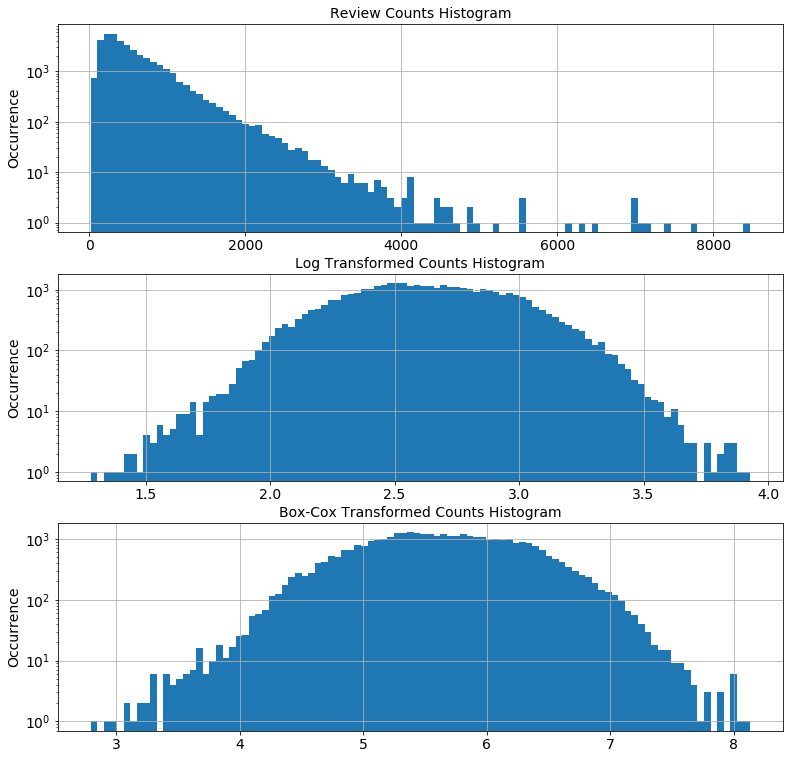

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(13,13))

# original review count histogram
df2[' n_tokens_content'].hist(ax=ax1, bins=100)
ax1.set_yscale('log')
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
df2['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.set_yscale('log')
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# review count after optimal Box-Cox transform
df2['rc_bc'].hist(ax=ax3, bins=100)
ax3.set_yscale('log')
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14);

Text(0.5, 1.0, 'Probplot after Box-Cox transform')

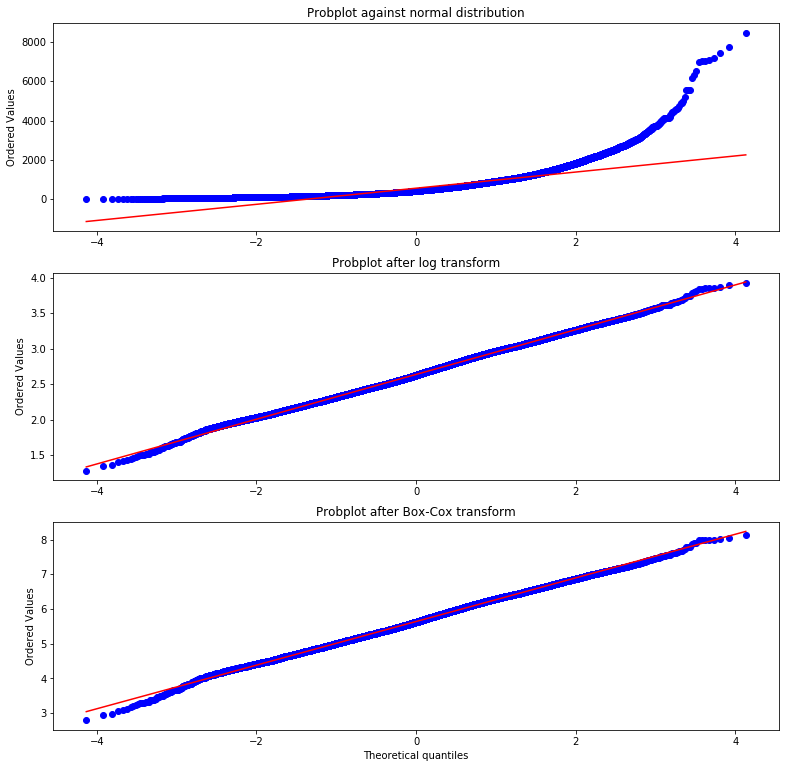

In [45]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(13,13))

prob1 = stats.probplot(df2[' n_tokens_content'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(df2['log_n_tokens_content'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(df2['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

Comparing the distribution of raw and transformed n_tokens_content against the normal distribution.

## Feature Scaling or Normalization

In [48]:
import sklearn.preprocessing as preproc

# Load the Online News Popularity dataset
df = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')

# Look at the original data - the number of words in an article
df[' n_tokens_content'].as_matrix()

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


array([219., 255., 211., ..., 442., 682., 157.])

In [50]:
# Min-max scaling
df['minmax'] = preproc.minmax_scale(df[[' n_tokens_content']])
df['minmax'].as_matrix()

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.02584376, 0.03009205, 0.02489969, ..., 0.05215955, 0.08048147,
       0.01852726])

In [51]:
# Standardization - note that by definition, some outputs will be negative
df['standardized'] = preproc.StandardScaler().fit_transform(df[[' n_tokens_content']])
df['standardized'].as_matrix()

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([-0.69521045, -0.61879381, -0.71219192, ..., -0.2218518 ,
        0.28759248, -0.82681689])

In [52]:
# L2-normalization
df['l2_normalized'] = preproc.normalize(df[[' n_tokens_content']], axis=0)
df['l2_normalized'].as_matrix()

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.00152439, 0.00177498, 0.00146871, ..., 0.00307663, 0.0047472 ,
       0.00109283])

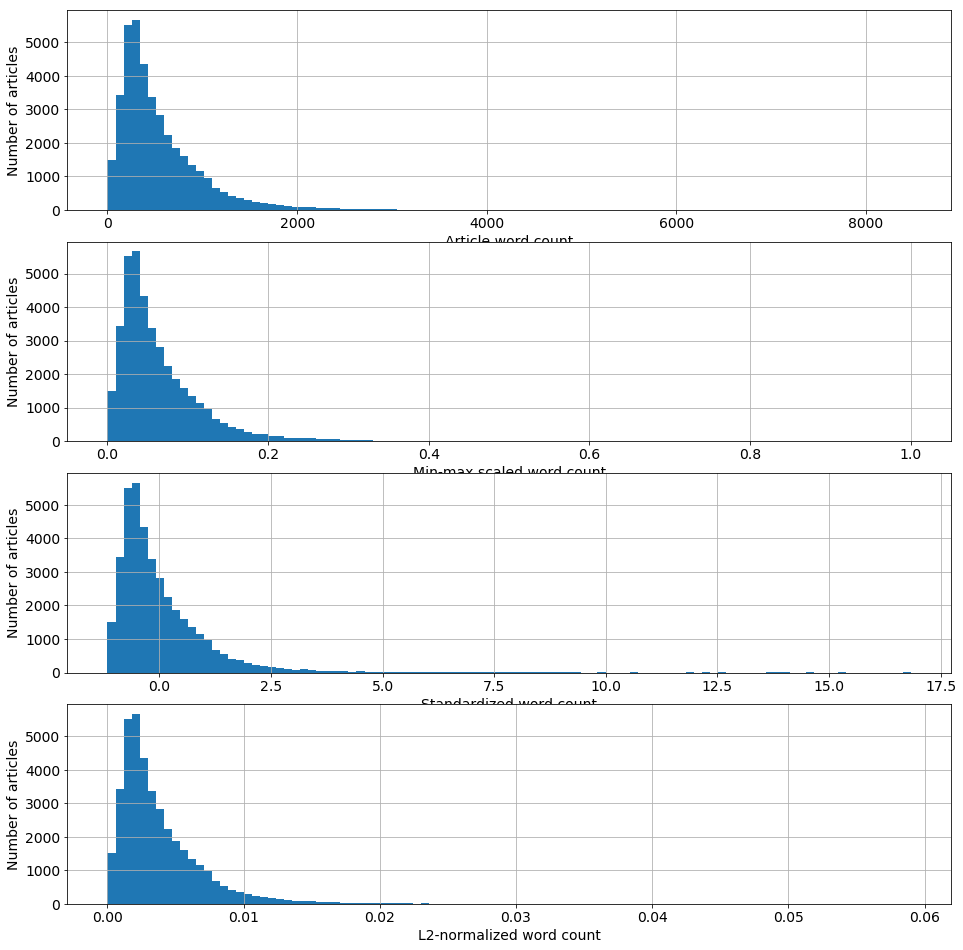

In [54]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(13,13))

fig.tight_layout()

df[' n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Article word count', fontsize=14)
ax1.set_ylabel('Number of articles', fontsize=14)

df['minmax'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Min-max scaled word count', fontsize=14)
ax2.set_ylabel('Number of articles', fontsize=14)

df['standardized'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('Standardized word count', fontsize=14)
ax3.set_ylabel('Number of articles', fontsize=14)

df['l2_normalized'].hist(ax=ax4, bins=100)
ax4.tick_params(labelsize=14)
ax4.set_xlabel('L2-normalized word count', fontsize=14)
ax4.set_ylabel('Number of articles', fontsize=14);

# Original and scaled news article word counts—note that only the scale of the x-axis changes; 
# the shape of the distribution stays the same with feature scaling

## Interaction Features

In [61]:
df.columns = df.columns.str.strip()

In [62]:
features = ['n_tokens_title', 'n_tokens_content',
...             'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
...             'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
...             'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
...             'data_channel_is_entertainment', 'data_channel_is_bus',
...             'data_channel_is_socmed', 'data_channel_is_tech',
...             'data_channel_is_world']

X = df[features]
y = df[['shares']]

In [63]:
X.shape

(39644, 17)

In [68]:
X[:2]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0


In [66]:
from sklearn.preprocessing import PolynomialFeatures

# Create pairwise interaction features, skipping the constant bias term
X2 =  PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [70]:
x = np.array([[1, 2, 3, 4, 5]])
PolynomialFeatures(include_bias=False).fit_transform(x)

array([[ 1.,  2.,  3.,  4.,  5.,  1.,  2.,  3.,  4.,  5.,  4.,  6.,  8.,
        10.,  9., 12., 15., 16., 20., 25.]])

In [74]:
x = np.array([[2]])
PolynomialFeatures(include_bias=False).fit_transform(x)

array([[2., 4.]])

In [67]:
X2[:2]

array([[1.20000000e+01, 2.19000000e+02, 6.63594467e-01, 9.99999992e-01,
        8.15384609e-01, 4.00000000e+00, 2.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 4.68036530e+00, 5.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.44000000e+02, 2.62800000e+03, 7.96313360e+00,
        1.19999999e+01, 9.78461531e+00, 4.80000000e+01, 2.40000000e+01,
        1.20000000e+01, 0.00000000e+00, 5.61643836e+01, 6.00000000e+01,
        0.00000000e+00, 1.20000000e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.79610000e+04, 1.45327188e+02,
        2.18999998e+02, 1.78569229e+02, 8.76000000e+02, 4.38000000e+02,
        2.19000000e+02, 0.00000000e+00, 1.02500000e+03, 1.09500000e+03,
        0.00000000e+00, 2.19000000e+02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.40357617e-01, 6.63594462e-01,
        5.41084715e-01, 2.65437787e+00, 1.32718893e+00, 6.635944

In [78]:
from sklearn.model_selection import train_test_split

# Create train/test sets for both feature sets
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, test_size=0.3, random_state=123)                                                             

def evaluate_feature(X_train, X_test, y_train, y_test):
    """Fit a linear regression model on the training set and 
    score on the test set"""
    model = linear_model.LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

# Train models and compare score on the two feature sets
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)

print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113215250
